In [14]:
import os
import sys
import csv
import cPickle as pickl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/home/wanli/data/Extended_ctr/convmf/gridsearch'
R = pickl.load(open(path + "/all_avg_results.dat", "rb"))

In [21]:
R['0.1-0.1-c-cnn_cae-50']

[0.273,
 0.383,
 0.491,
 0.587,
 0.637,
 0.67,
 0.695,
 0.711,
 0.725,
 0.737,
 0.747,
 0.756,
 0.496,
 0.291,
 0.238]

['Rec@5', 'Rec@10', 'Rec@20', 'Rec@40', 'Rec@60', 'Rec@80', 'Rec@100', 'Rec@120', 'Rec@140', 'Rec@160', 'Rec@180', 'Rec@200', 'MRR@10', 'nDCG@5', 'nDCG@10']


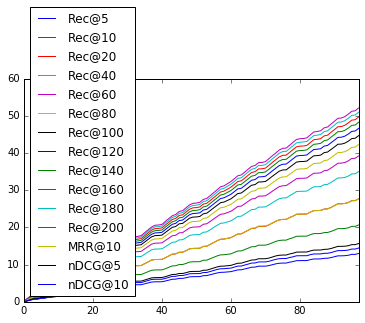

     Rec@5  Rec@10  Rec@20  Rec@40  Rec@60  Rec@80  Rec@100  Rec@120  Rec@140  \
0    0.001   0.002   0.005   0.013   0.020   0.027    0.033    0.039    0.045   
1    0.276   0.383   0.493   0.601   0.657   0.697    0.729    0.753    0.772   
2    0.528   0.732   0.961   1.175   1.289   1.369    1.426    1.471    1.506   
3    0.800   1.110   1.448   1.760   1.924   2.035    2.116    2.179    2.228   
4    0.802   1.114   1.456   1.775   1.947   2.064    2.151    2.220    2.274   
5    1.073   1.490   1.943   2.364   2.588   2.736    2.847    2.937    3.005   
6    1.077   1.497   1.956   2.386   2.617   2.773    2.891    2.987    3.061   
7    1.352   1.876   2.441   2.971   3.250   3.437    3.582    3.695    3.784   
8    1.366   1.900   2.482   3.038   3.340   3.545    3.707    3.835    3.940   
9    1.532   2.158   2.863   3.548   3.927   4.185    4.385    4.544    4.671   
10   1.700   2.417   3.240   4.062   4.517   4.831    5.070    5.258    5.409   
11   1.974   2.797   3.728  

In [18]:
recall_breaks=[5, 10] + list(xrange(20, 201, 20))
mrr_breaks=[10]
ndcg_breaks=[5, 10]
results_header = ["Rec@" + str(i) for i in recall_breaks] + ["MRR@" + str(i) for i in mrr_breaks] + ["nDCG@" + str(i) for i in ndcg_breaks]
print results_header
df = pd.DataFrame.from_records(R.values(), columns=results_header)
df = df.cumsum()
plt.figure(); df.plot();
plt.show()
print df

In [1]:
'''Train a recurrent convolutional network on the IMDB sentiment
classification task.
Gets to 0.8498 test accuracy after 2 epochs. 41s/epoch on K520 GPU.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

'''
Note:
batch_size is highly sensitive.
Only 2 epochs are needed as the dataset is very small.
'''

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')


Pad sequences (samples x time)


x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [2]:

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Pad sequences (samples x time)


x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [ ]:

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


In [21]:
import tensorflow as tf
# Before the loop:
# Before the loop:

writer = tf.summary.FileWriter('/home/zaher/tf_summary/2',flush_secs=2)
def log_scalar(tag, value, step):
    """Log a scalar variable.
    
    Parameter
    ----------
    tag : basestring
    Name of the scalar
    value
    step : int
    training iteration
    """
    
    summary = tf.Summary(value=[tf.Summary.Value(tag=tag,
                                             simple_value=value)])
    writer.add_summary(summary, step)
# Inside the loop:
for i in range(100):
    log_scalar('train',i*(3-i),i)
    log_scalar('val',i*(5-i),i)
    log_scalar('test',i*(7-i),i)

In [ ]:
import numpy as np
import cupy as cp


ModuleNotFoundError: No module named 'cupy'